# PCA

this notebook and codes are from <a href="https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21">here medium</a>

In [3]:
import numpy 
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer


cancer = load_breast_cancer()

findfont: Font family ['NanumBarunpenRegular'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunpenRegular'] not found. Falling back to DejaVu Sans.


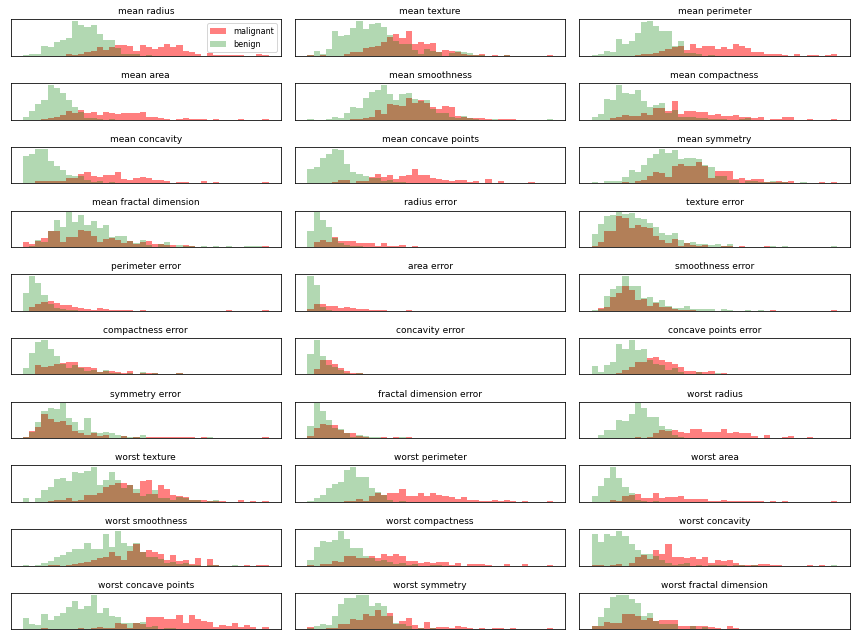

In [4]:
fig,axes =plt.subplots(10,3, figsize=(12, 9)) 
malignant=cancer.data[cancer.target==0] 
benign=cancer.data[cancer.target==1] 
ax=axes.ravel()
for i in range(30):
    _,bins=np.histogram(cancer.data[:,i],bins=40)
    ax[i].hist(malignant[:,i],bins=bins,color='r',alpha=.5)
    ax[i].hist(benign[:,i],bins=bins,color='g',alpha=0.3)
    ax[i].set_title(cancer.feature_names[i],fontsize=9)
    ax[i].axes.get_xaxis().set_visible(False)
    ax[i].set_yticks(())
    
    
ax[0].legend(['malignant','benign'],loc='best',fontsize=8)
plt.tight_layout()
plt.show()

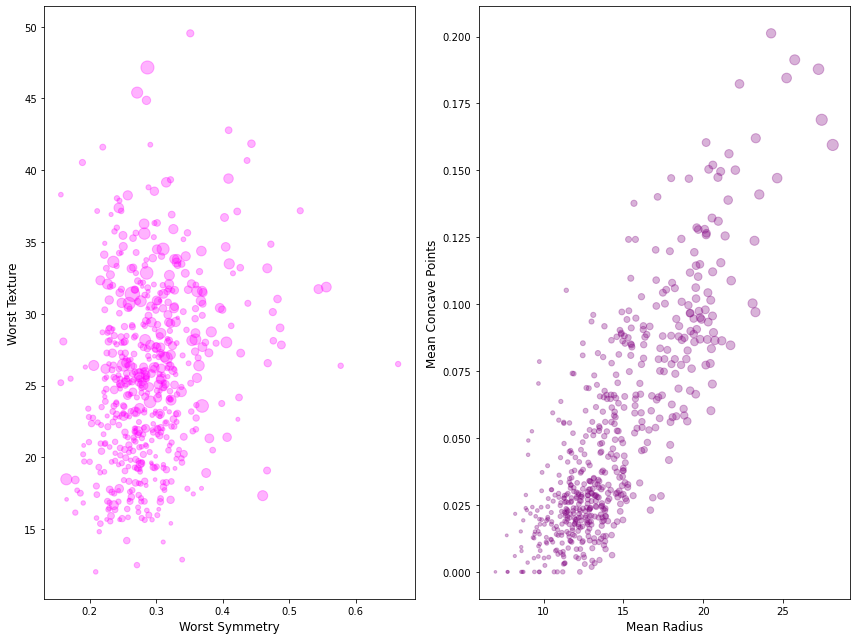

In [13]:
import pandas as pd

cancer_frame = pd.DataFrame(cancer.data,columns=cancer.feature_names)

plt.figure(figsize=(12,9))
plt.subplot(1, 2, 1)
plt.scatter(cancer_frame['worst symmetry'], cancer_frame['worst texture'],
            s= cancer_frame['worst area']*0.05,
            color='magenta', label='check', alpha=0.3)

plt.xlabel('Worst Symmetry',fontsize=12)
plt.ylabel('Worst Texture',fontsize=12)
plt.subplot(1,2,2)# 2nd plot
plt.scatter(cancer_frame['mean radius'], cancer_frame['mean concave points'], s=cancer_frame['mean area']*0.05, color='purple', label='check', alpha=0.3)
plt.xlabel('Mean Radius',fontsize=12)
plt.ylabel('Mean Concave Points',fontsize=12)
plt.tight_layout()
plt.show()

In [39]:
cancer_frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(cancer.data)

In [31]:
X_scaled.min()

0.0

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

X_pca = pca.fit_transform(X_scaled)

In [38]:
pca_frame = pd.DataFrame(X_pca,columns=['component_1', 'component_2', 'component_3'])

In [41]:
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio )

[0.68517019 0.22302537 0.09180444]


In [53]:
ex_variance/sum(np.var(pca_frame))

array([0.68517019, 0.22302537, 0.09180444])

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


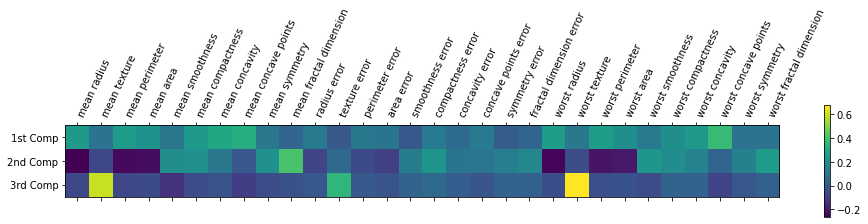

In [60]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=65,ha='left')
plt.tight_layout()
plt.show()

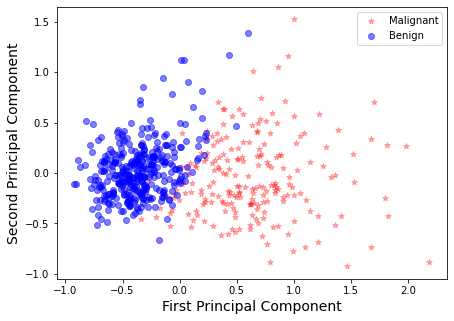

In [76]:
comp_1 = X_pca[:,0]
comp_2 = X_pca[:,1]
comp_3 = X_pca[:,2]

labels = cancer.target

color_dict = {0: 'red', 1: 'blue'}
alpha = {0: 0.3, 1: 0.5}
label = {0: 'Malignant', 1: 'Benign'}
marker = {0: '*', 1: 'o'}

fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')

for l in np.unique(labels):
    ix = np.where(labels == l)
    ax.scatter(comp_1[ix], comp_2[ix], label = label[l], alpha = alpha[l], marker= marker[l], c= color_dict[l])
    
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

array([0.53097689, 0.1728349 , 0.07114442])